In [28]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

from astropy.visualization import make_lupton_rgb, SqrtStretch, ImageNormalize, simple_norm


from astropy.io import fits
from astropy.table import Table, unique, join, vstack
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
from astropy.visualization import make_lupton_rgb

from astropy.visualization import SqrtStretch
from astropy.visualization import ZScaleInterval

from astropy.nddata import Cutout2D
from astropy import units as u
from astropy import constants as Cons
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord, Galactic, Angle

plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3


from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from astropy.visualization.wcsaxes import SphericalCircle
#from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from astropy.visualization.wcsaxes import WCSAxes

from matplotlib_scalebar.scalebar import ScaleBar

from astropy.coordinates import Angle
import matplotlib.patches as patches

In [2]:
#import pyregion  #FOR REGIONS OF DS9

In [3]:
def eq_coord(RA, DEC):
    c = SkyCoord(str(reg['RA']), str(reg['DEC']), unit=(u.hourangle, u.deg))
    ra = c.ra*u.deg
    dec = c.dec*u.deg
    return ra, dec

def galactic(ra,dec):
    c = SkyCoord(ra*u.hourangle, dec*u.hourangle)
    l = c.galactic.l*u.degree
    b = c.galactic.b*u.degree
    return l, b

In [4]:
hdu = fits.open('jw02731-o001_t017_nircam_clear-f444w_i2d.fits')
hdu.info()

Filename: jw02731-o001_t017_nircam_clear-f444w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     372   ()      
  1  SCI           1 ImageHDU        75   (7065, 4179)   float32   
  2  ERR           1 ImageHDU        10   (7065, 4179)   float32   
  3  CON           1 ImageHDU         9   (7065, 4179)   int32   
  4  WHT           1 ImageHDU         9   (7065, 4179)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (7065, 4179)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (7065, 4179)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (7065, 4179)   float32   
  8  HDRTAB        1 BinTableHDU    816   40R x 403C   [23A, 5A, 3A, 48A, 7A, 13A, 7A, 5A, 7A, 10A, 4A, L, D, D, D, D, 32A, 48A, 32A, 21A, 3A, 3A, D, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D, D, D, D, 27A, D, D, D, 6A, 8A, 1A, 4A, 5A, 5A, L, D, D, D, D, D, D, D, D

In [5]:
f440 = fits.open('jw02731-o001_t017_nircam_clear-f444w_i2d.fits')[1]
wcs = WCS(f440.header)

Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.574327 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654444171.915 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [6]:
#reg = Table.read('Regions_JWST_HH+Gal_mio.cat', format='ascii')
reg = Table.read('jwst_paper.cat', format='ascii')

In [7]:
f440_pixscale = 0.11 #arcsec/pixel

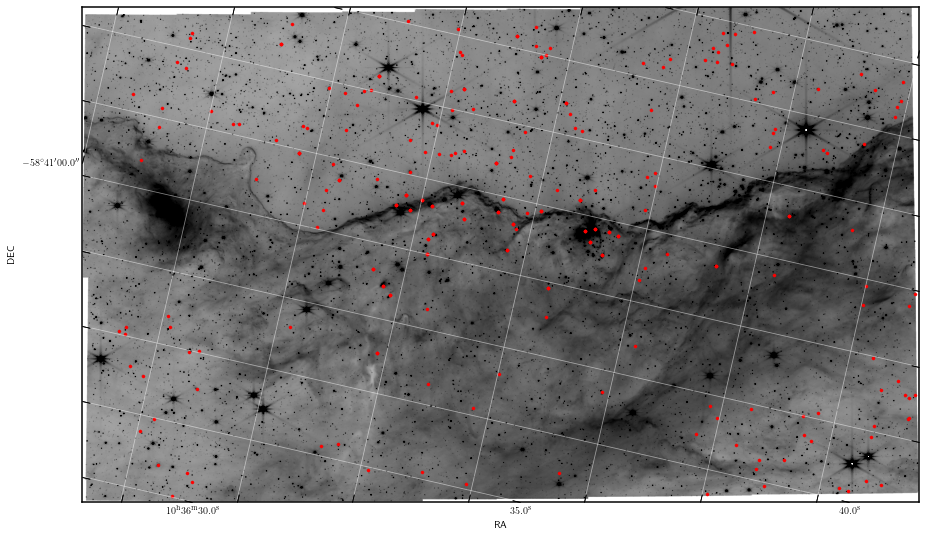

In [38]:
# norm = simple_norm(f440.data, 'linear', min_percent=0.5, max_percent=99.5)
norm = simple_norm(f440.data, stretch='asinh', min_percent=1, max_percent=99) #stretch='asinh, sqrt'

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(f440.data, origin='lower', norm=norm, cmap=plt.cm.gray_r, interpolation=None)
ax.scatter(reg['RA'], reg['DEC'], s=10, fc='red', ec='red', lw=0.3, transform=ax.get_transform('icrs'))

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.minorticks_on()

# Add grid of equatorial coordinates
ax.coords.grid(color='white', linestyle='solid', alpha=0.5)

# Set tick labels format to hh:mm:ss.s, dd:mm:ss.s
ax.coords['ra'].set_ticks(number=10)  # Set the number of ticks in the x-axis
ax.coords['dec'].set_ticks(number=10)  # Set the number of ticks in the y-axis
ax.coords['ra'].set_major_formatter('hh:mm:ss.s')
ax.coords['dec'].set_major_formatter('dd:mm:ss.s')
#ax.coords[0].set_major_formatter('d.d')
#ax.coords[1].set_major_formatter('d.d')



In [32]:
#coords = SkyCoord(reg['RA'], reg['DEC'], unit=(u.hourangle, u.deg))
#ra_deg = coords.ra.deg
#dec_deg = coords.dec.deg
#reg['ra_deg'] = ra_deg
#reg['dec_deg'] = dec_deg

In [33]:
print(min(reg['DEC']), max(reg['DEC']))

-58.6783322 -58.5560286


In [34]:
coords = SkyCoord('10:37:00.7058' '-58:40:19.159', unit=(u.hourangle, u.deg))
print(coords)
print(coords.ra.deg)
print(coords.dec.deg)

<SkyCoord (ICRS): (ra, dec) in deg
    (159.25294083, -58.67198861)>
159.25294083333333
-58.67198861111111


In [35]:
#norm = simple_norm(f440.data, stretch='asinh', min_percent=1, max_percent=99) 
#OPTIONS:
###stretch='asinh, sqrt'
###min_cut=0, max_cut=data.max()
###min_percent=1, max_percent=99

[[1.7655531 1.7491639 1.734533  ... 1.9265862 1.8786945 1.8147068]
 [1.806709  1.7866048 1.7827805 ... 1.9070948 1.899148  1.8699551]
 [1.7604423 1.7756249 1.7646569 ... 1.8908923 1.9126688 1.9002936]
 ...
 [1.9500091 2.0108285 1.8868827 ... 1.857471  1.8383132 1.8130002]
 [2.2715898 2.3472705 2.0998678 ... 1.8586687 1.8169816 1.8308178]
 [2.437708  2.4389365 2.226258  ... 1.8515515 1.8205808 1.8388102]]


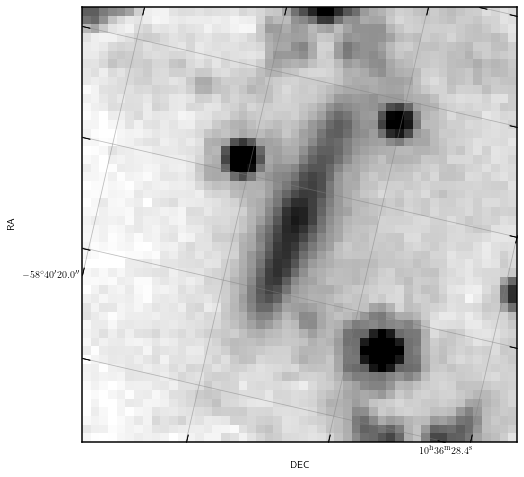

In [36]:
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

coords = SkyCoord('10:37:00.7058', '-58:40:19.159', unit=(u.hourangle, u.deg))

position = SkyCoord(coords.ra.deg, coords.dec.deg, unit=(u.deg, u.deg), frame='icrs')
cutout = Cutout2D(f440.data, position, (50, 50), wcs=wcs)
print(cutout.data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
norm = simple_norm(cutout.data, stretch='asinh', min_percent=1, max_percent=99)
ax.imshow(cutout.data, origin='lower', norm=norm, cmap=plt.cm.gray_r, interpolation=None)

ax.set_xlabel('DEC')
ax.set_ylabel('RA')
ax.coords.grid(color='gray', linestyle='solid', alpha=0.5)

#ax.coords['ra'].set_ticks(number=5, minor=5)  # Set the number of major and minor ticks in the x-axis
#ax.coords['dec'].set_ticks(number=4, minor=4)  # Set the number of major and minor ticks in the y-axis

ax.coords['ra'].set_major_formatter('hh:mm:ss.s')
ax.coords['dec'].set_major_formatter('dd:mm:ss.s')

plt.show()



In [108]:
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
#import matplotlib.font_manager as fm
#fontprops = fm.FontProperties(size=18)
#fig, ax = plt.subplots()
#ax.imshow(np.random.random((10,10)),extent=[0,100,0,100]) 

#Extent defines the images max and min of the horizontal and vertical values.

scalebar = AnchoredSizeBar(ax.transData, 1, '1 deg', 'lower left', pad=0.1, color='white', frameon=False,
                           size_vertical=1)

ax.add_artist(scalebar)


[[1.7655531 1.7491639 1.734533  ... 1.9265862 1.8786945 1.8147068]
 [1.806709  1.7866048 1.7827805 ... 1.9070948 1.899148  1.8699551]
 [1.7604423 1.7756249 1.7646569 ... 1.8908923 1.9126688 1.9002936]
 ...
 [1.9500091 2.0108285 1.8868827 ... 1.857471  1.8383132 1.8130002]
 [2.2715898 2.3472705 2.0998678 ... 1.8586687 1.8169816 1.8308178]
 [2.437708  2.4389365 2.226258  ... 1.8515515 1.8205808 1.8388102]]


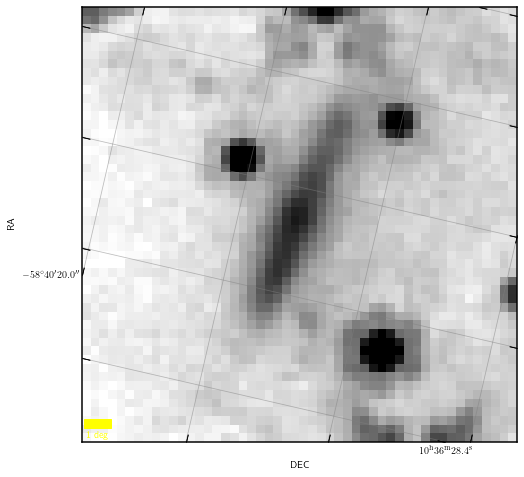

In [111]:
coords = SkyCoord('10:37:00.7058' '-58:40:19.159', unit=(u.hourangle, u.deg))

position = SkyCoord(coords.ra.deg, coords.dec.deg, unit=(u.deg,u.deg),frame='icrs')
cutout = Cutout2D(f440.data, position, (50,50), wcs=wcs)
print(cutout.data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
norm = simple_norm(cutout.data, stretch='asinh', min_percent=1, max_percent=99)
ax.imshow(cutout.data, origin='lower', norm=norm, cmap=plt.cm.gray_r, interpolation=None)

ax.set_xlabel('DEC')
ax.set_ylabel('RA')
ax.coords.grid(color='gray', linestyle='solid', alpha=0.5)

ax.coords['ra'].set_ticks(number=5)  # Set the number of ticks in the x-axis
ax.coords['dec'].set_ticks(number=4)  # Set the number of ticks in the y-axis
ax.coords['ra'].set_major_formatter('hh:mm:ss.s')
ax.coords['dec'].set_major_formatter('dd:mm:ss.s')

scalebar = AnchoredSizeBar(ax.transData, 3, '1 deg', 'lower left', pad=0.1, color='yellow', frameon=False,
                           size_vertical=1)

ax.add_artist(scalebar)

#figures.append(fig)
#scalebar = ScaleBar(3 * u.arcsec, location='lower right', frameon=False, color='white', box_alpha=0.5)

In [61]:
figures = []
for i in range(len(reg)):
    coords = SkyCoord(reg['RA'][i], reg['DEC'][i], unit=(u.deg, u.deg))
    position = SkyCoord(coords.ra.deg, coords.dec.deg, unit=(u.deg, u.deg), frame='icrs')
    cutout = Cutout2D(f440.data, position, (100, 100), wcs=wcs)
    coordinate = position.to_string('hmsdms')
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)
    norm = simple_norm(cutout.data, 'asinh', min_percent=0.5, max_percent=99.5)
    ax.imshow(cutout.data, origin='lower', norm=norm, cmap=plt.cm.gray_r, interpolation=None)
    ax.set_title(coordinate)
    ax.set_xlabel('DEC')
    ax.set_ylabel('RA')
    
    figures.append(fig)
# Save the figures as a multi-page PDF without displaying them
with PdfPages('image_collection.pdf') as pdf:
    for fig in figures:
        pdf.savefig(fig)
        plt.close(fig)


/home/pmarchantc/opt/miniconda3/envs/proc/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


# 3 NIRCam short wavelength channel images
r = fits.open('jw02731-o001_t017_nircam_clear-f444w_i2d.fits')[1].data
g = fits.open('jw02731-o001_t017_nircam_clear-f335m_i2d.fits')[1].data
b = fits.open('jw02731-o001_t017_nircam_clear-f090w_i2d.fits')[1].data

rgb = make_lupton_rgb(r, g, b, Q=5, stretch=0.02)  # , minimum=-0.001

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=imwcs)
plt.imshow(rgb, origin='lower')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
fig.tight_layout()
plt.subplots_adjust(left=0.15)

ValueError: The image shapes must match. r: (4179, 7065), g: (4180, 7062) b: (8586, 14340)